In [2]:
from tornado.web import decode_signed_value
%load_ext autoreload
%autoreload 2

In [3]:
from person import Person
from hexagonal_lattice import HexagonalLattice, HexagonalCoord
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np

In [23]:
# num
rows = 50
columns = 50

In [24]:
assert rows%2==0, "I'm lazy, just use an even number of rows"
base_geometry = HexagonalLattice(HexagonalCoord(2, rows/2, columns))

In [10]:
person = Person(geometry=base_geometry, seed=HexagonalCoord(0,0,0))
person.run()

# Preferential returns model
We have a square lettuce with each site being $1 \text{km}^2$. We start with just on person in the center of the lattice.



## Lattice setup

In [53]:
def plot_trajectories(members):
    cmap = plt.get_cmap('hsv', len(members))
    for m,member in enumerate(members):
        for i in range(0, len(member.trajectory)-1):
            origin = member.trajectory[i].cartesian
            destination = member.trajectory[i+1].cartesian
            plt.plot([origin[0], destination[0]],[origin[1],destination[1]], 'o-', markersize=2, alpha=0.4, color=cmap(m))
        plt.scatter([member.trajectory[0].cartesian[0]], [member.trajectory[0].cartesian[1]], color=cmap(m), zorder=10)
    plt.show()

In [58]:
number_of_individuals = 25
number_of_steps = 100
seeds = np.array([np.random.randint(0,1, size=number_of_individuals),
                  np.random.randint(0,rows//2, size=number_of_individuals),
                  np.random.randint(0, columns, size=number_of_individuals)]).T
people = [Person(geometry=base_geometry,seed=HexagonalCoord(*seeds[i,:])) for i in range(seeds.shape[0])]
for person in people:
    person.run(number_of_steps)

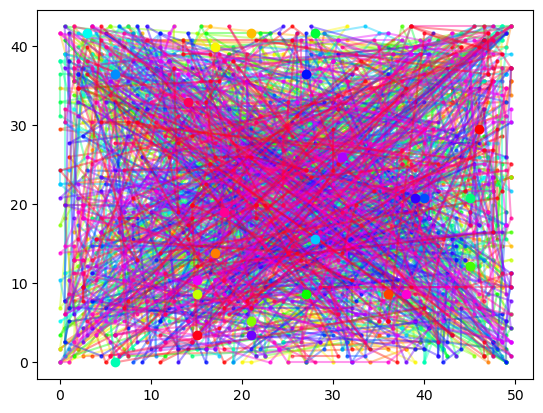

In [59]:
plot_trajectories(people)

## Jump kernel
Starting with a Cauchy distribution, but could also do a normal distribution convolved with something that has a fatter tail?


In [3]:
from scipy.stats import cauchy

cauchy.rvs(loc=0, scale=1, size=1000)

